   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


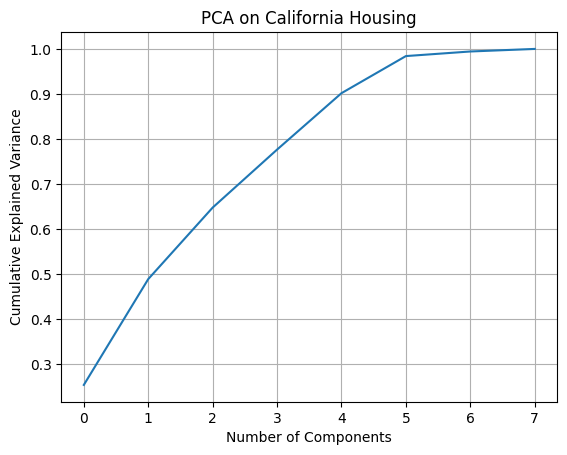

PCR — MSE: 0.6676, R2: 0.4905
Linear Regression — MSE: 0.5559, R2: 0.5758
PCR coefficients in original feature space:
MedInc        0.750421
HouseAge      0.239632
AveRooms      0.147320
AveBedrms    -0.154598
Population    0.038617
AveOccup     -0.043874
Latitude     -0.087155
Longitude    -0.035755
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load California housing data
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Quick look at data
print(X.head())
print(y.head())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA on California Housing')
plt.grid(True)
plt.show()

# Decide how many components to keep (e.g. k)
k = 6  # example
X_pca_k = X_pca[:, :k]

# PCR
X_train, X_test, y_train, y_test = train_test_split(X_pca_k, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"PCR — MSE: {mse:.4f}, R2: {r2:.4f}")

# Regular Linear Regression (on original scaled features)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
reg_orig = LinearRegression()
reg_orig.fit(X_train_o, y_train_o)
y_pred_orig = reg_orig.predict(X_test_o)

mse_orig = mean_squared_error(y_test_o, y_pred_orig)
r2_orig = r2_score(y_test_o, y_pred_orig)
print(f"Linear Regression — MSE: {mse_orig:.4f}, R2: {r2_orig:.4f}")

# (Optional) Transform PCR coefficients back to original feature space
beta_original = pca.components_[:k].T @ reg.coef_
coef_series = pd.Series(beta_original, index=X.columns)
print("PCR coefficients in original feature space:")
print(coef_series)
